In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    precision_score, recall_score
)
import matplotlib.pyplot as plt
import seaborn as sns

# Load
df = pd.read_csv("1) iris.csv")


In [2]:
feature_cols = [c for c in df.columns if c != 'species']
X = df[feature_cols]
y = df['species']

le = LabelEncoder()
y_enc = le.fit_transform(y)
print("Label mapping:", dict(zip(le.classes_, le.transform(le.classes_))))

Label mapping: {'setosa': 0, 'versicolor': 1, 'virginica': 2}


In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split (stratify to keep class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_enc, test_size=0.2, random_state=42, stratify=y_enc
)


In [ ]:
k_values = list(range(1, 26, 2))
cv_scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

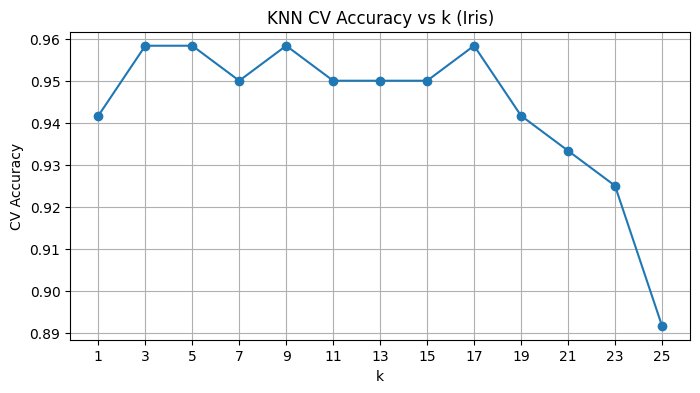

In [5]:
plt.figure(figsize=(8,4))
plt.plot(k_values, cv_scores, marker='o')
plt.title('KNN CV Accuracy vs k (Iris)')
plt.xlabel('k')
plt.ylabel('CV Accuracy')
plt.grid(True)
plt.xticks(k_values)
plt.show()

In [6]:
best_k = k_values[int(np.argmax(cv_scores))]
print(f"Best k by CV: {best_k} (CV acc = {max(cv_scores):.4f})")

Best k by CV: 9 (CV acc = 0.9583)


In [7]:
model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
precision_macro = precision_score(y_test, y_pred, average='macro')
recall_macro = recall_score(y_test, y_pred, average='macro')


In [8]:
print(f"Test Accuracy: {acc:.4f}")
print(f"Precision (macro): {precision_macro:.4f}")
print(f"Recall (macro): {recall_macro:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

Test Accuracy: 0.9667
Precision (macro): 0.9697
Recall (macro): 0.9667

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.91      1.00      0.95        10
   virginica       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



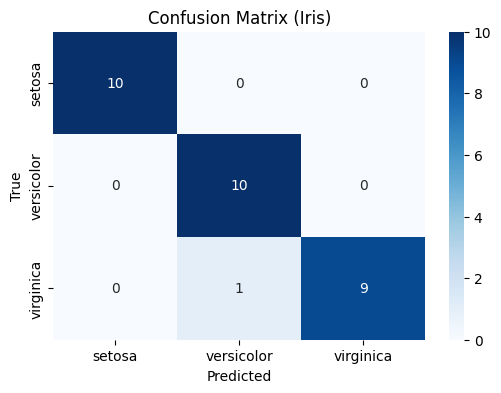

In [9]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Iris)')
plt.show()